In [1]:
import pandas as pd
df = pd.read_csv('cleaned_transactions.csv')

In [2]:
df.head()

,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Month_Category
0,37249,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,...,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,9
1,69749,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,...,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,12
2,30192,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,...,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,4
3,62101,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,...,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,5
4,27901,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,...,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,1


In [3]:
df.columns

Index(['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State',
       'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment',
       'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount',
       'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type',
       'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status',
       'Ratings', 'products', 'Month_Category'],
      dtype='object')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
daily_sales = df.groupby('Date')['Total_Amount'].sum().reset_index()

In [6]:
daily_sales.rename(columns={'Total_Amount':'Sales'},inplace=True)

In [7]:
daily_sales.sort_values('Date').reset_index(drop=True)

,Date,Sales
0,2023-03-01,1.078318e+06
1,2023-03-02,1.104818e+06
2,2023-03-03,1.071230e+06
3,2023-03-04,1.059627e+06
4,2023-03-05,1.125217e+06
...,...,...
361,2024-02-25,1.041947e+06
362,2024-02-26,1.086292e+06
363,2024-02-27,1.173704e+06
364,2024-02-28,1.137981e+06


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
14:38:05 - cmdstanpy - INFO - Chain [1] start processing
14:38:06 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
336 2024-01-31  1.094922e+06  1.029331e+06  1.156542e+06
337 2024-02-01  1.097828e+06  1.035520e+06  1.156097e+06
338 2024-02-02  1.115368e+06  1.049138e+06  1.175591e+06
339 2024-02-03  1.099153e+06  1.032980e+06  1.161897e+06
340 2024-02-04  1.099894e+06  1.033365e+06  1.166276e+06
341 2024-02-05  1.098120e+06  1.038844e+06  1.158691e+06
342 2024-02-06  1.095301e+06  1.034386e+06  1.157737e+06
343 2024-02-07  1.091676e+06  1.030398e+06  1.153336e+06
344 2024-02-08  1.092845e+06  1.030386e+06  1.152899e+06
345 2024-02-09  1.108702e+06  1.048720e+06  1.173234e+06
346 2024-02-10  1.090916e+06  1.026244e+06  1.152693e+06
347 2024-02-11  1.090256e+06  1.024444e+06  1.152231e+06
348 2024-02-12  1.087305e+06  1.028853e+06  1.150240e+06
349 2024-02-13  1.083579e+06  1.024013e+06  1.148941e+06
350 2024-02-14  1.079357e+06  1.019641e+06  1.141358e+06
351 2024-02-15  1.080273e+06  1.016994e+06  1.143899e+06
352 2024-02-16  1.096239e+06  1

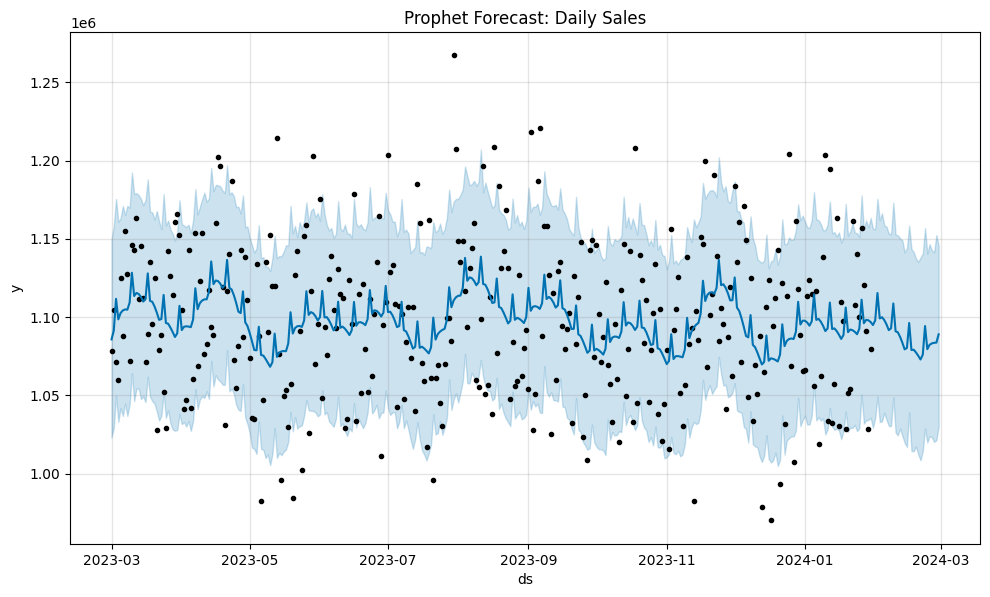

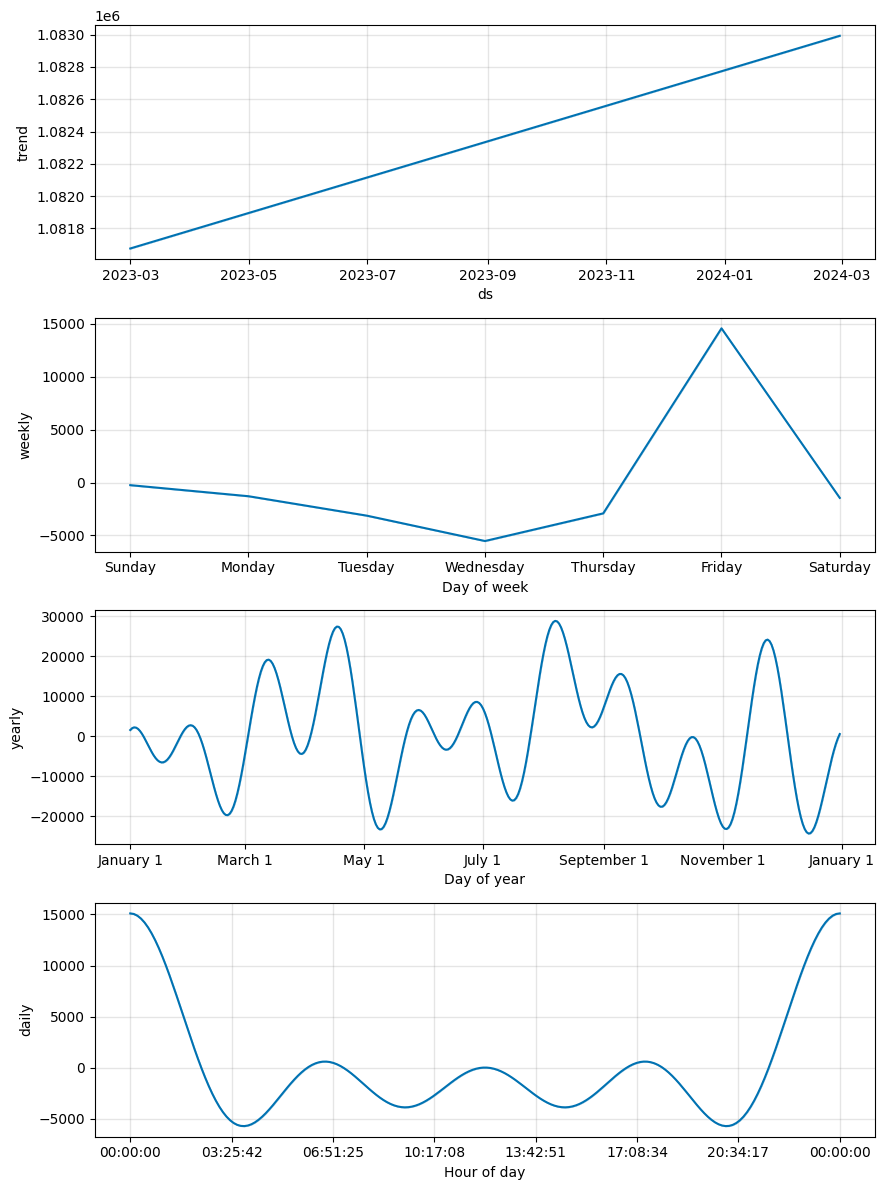

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt


prophet_df = daily_sales.rename(columns={'Date': 'ds', 'Sales': 'y'})


train = prophet_df[:-30]
test = prophet_df[-30:]


model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(train)


future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


prophet_results = forecast[['ds', 'yhat']].set_index('ds')
test_results = test.set_index('ds')

comparison = test_results.join(prophet_results, how='inner')


mae = mean_absolute_error(comparison['y'], comparison['yhat'])
rmse = np.sqrt(mean_squared_error(comparison['y'], comparison['yhat']))
mape = np.mean(np.abs((comparison['y'] - comparison['yhat']) / comparison['y'])) * 100

print("Evaluation on Last 30 Days:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")


Evaluation on Last 30 Days:
MAE: 52,928.97
RMSE: 68,455.59
MAPE: 4.64%


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was ren

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10303.223, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=10065.624, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=10009.965, Time=0.17 sec


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=9995.926, Time=0.10 sec


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=9990.665, Time=0.18 sec


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.94 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=9989.455, Time=0.17 sec


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=1.28 sec
 ARIMA(0,0,6)(0,0,0)[0]             : AIC=9989.395, Time=0.16 sec


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,6)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(0,0,7)(0,0,0)[0]             : AIC=9989.793, Time=0.09 sec


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,7)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(0,0,6)(0,0,0)[0] intercept   : AIC=8252.609, Time=0.06 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=8250.562, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=8248.491, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=8248.192, Time=0.03 sec


c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was ren

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=8247.055, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8245.024, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8243.780, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8245.006, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8247.012, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 7.313 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:                        SARIMAX   Log Likelihood               -4119.890
Date:                Wed, 17 Sep 2025   AIC                           8243.780
Time:                        14:46:18   BIC                           8251.414
Sample:                    03-01-2023   HQIC                          8246.823
                         - 01-30-2024                                         
Covariance Type:                  opg   

c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Vikrant Yadav\Desktop\AIML\coding\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


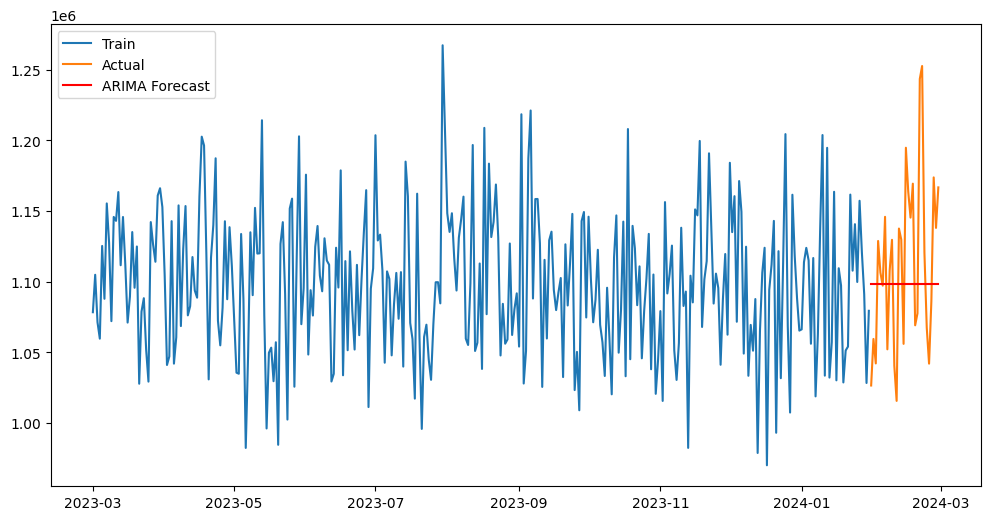

In [ ]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Use your existing daily_sales dataframe
df = daily_sales.copy()


df = df.set_index('Date')
df = df.asfreq('D')  

# Train/test split
train = df.iloc[:-30]
test = df.iloc[-30:]

# Auto ARIMA
stepwise_fit = auto_arima(train['Sales'],
                          start_p=1, start_q=1,
                          max_p=7, max_q=7,
                          d=None,
                          seasonal=False,
                          trace=True,
                          error_action="ignore",
                          suppress_warnings=True,
                          stepwise=True)

print(stepwise_fit.summary())

best_order = stepwise_fit.order
model = ARIMA(train['Sales'], order=best_order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)
forecast = pd.Series(forecast, index=test.index)

mae = mean_absolute_error(test['Sales'], forecast)
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast))
mape = np.mean(np.abs((test['Sales'] - forecast)/test['Sales'])) * 100

print(f"\nARIMA Evaluation on Last 30 Days:\nMAE: {mae:,.2f}\nRMSE: {rmse:,.2f}\nMAPE: {mape:.2f}%")

plt.figure(figsize=(12,6))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Actual')
plt.plot(forecast.index, forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.show()


In [ ]:
from prophet import Prophet
import pandas as pd

prophet_df = daily_sales.rename(columns={'Date': 'ds', 'Sales': 'y'})

prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True)
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=30)
prophet_forecast = prophet_model.predict(future)

prophet_next_30 = prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)
print("Prophet Next 30 Days Forecast:")
print(prophet_next_30)


14:52:04 - cmdstanpy - INFO - Chain [1] start processing
14:52:05 - cmdstanpy - INFO - Chain [1] done processing


Prophet Next 30 Days Forecast:
            ds          yhat    yhat_lower    yhat_upper
366 2024-03-01  1.169386e+06  1.107043e+06  1.234872e+06
367 2024-03-02  1.156011e+06  1.093739e+06  1.223289e+06
368 2024-03-03  1.158822e+06  1.096575e+06  1.223678e+06
369 2024-03-04  1.161383e+06  1.101745e+06  1.221409e+06
370 2024-03-05  1.164505e+06  1.098876e+06  1.226876e+06
371 2024-03-06  1.162125e+06  1.096334e+06  1.228577e+06
372 2024-03-07  1.171069e+06  1.103894e+06  1.234074e+06
373 2024-03-08  1.185176e+06  1.122792e+06  1.246518e+06
374 2024-03-09  1.169929e+06  1.108983e+06  1.232260e+06
375 2024-03-10  1.170670e+06  1.107554e+06  1.238796e+06
376 2024-03-11  1.171000e+06  1.104325e+06  1.238333e+06
377 2024-03-12  1.171774e+06  1.108073e+06  1.238638e+06
378 2024-03-13  1.166974e+06  1.105220e+06  1.230516e+06
379 2024-03-14  1.173480e+06  1.111956e+06  1.232952e+06
380 2024-03-15  1.185186e+06  1.122967e+06  1.247960e+06
381 2024-03-16  1.167628e+06  1.104146e+06  1.230237e+06


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df = daily_sales.copy().set_index('Date')
df = df.asfreq('D')

arima_model = ARIMA(df['Sales'], order=best_order)
arima_fit = arima_model.fit()

future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
arima_forecast_30 = arima_fit.forecast(steps=30)
arima_forecast_30 = pd.Series(arima_forecast_30, index=future_dates)
print("\nARIMA Next 30 Days Forecast:")
print(arima_forecast_30)



ARIMA Next 30 Days Forecast:
2024-03-01    1.099394e+06
2024-03-02    1.099394e+06
2024-03-03    1.099394e+06
2024-03-04    1.099394e+06
2024-03-05    1.099394e+06
2024-03-06    1.099394e+06
2024-03-07    1.099394e+06
2024-03-08    1.099394e+06
2024-03-09    1.099394e+06
2024-03-10    1.099394e+06
2024-03-11    1.099394e+06
2024-03-12    1.099394e+06
2024-03-13    1.099394e+06
2024-03-14    1.099394e+06
2024-03-15    1.099394e+06
2024-03-16    1.099394e+06
2024-03-17    1.099394e+06
2024-03-18    1.099394e+06
2024-03-19    1.099394e+06
2024-03-20    1.099394e+06
2024-03-21    1.099394e+06
2024-03-22    1.099394e+06
2024-03-23    1.099394e+06
2024-03-24    1.099394e+06
2024-03-25    1.099394e+06
2024-03-26    1.099394e+06
2024-03-27    1.099394e+06
2024-03-28    1.099394e+06
2024-03-29    1.099394e+06
2024-03-30    1.099394e+06
Freq: D, Name: predicted_mean, dtype: float64


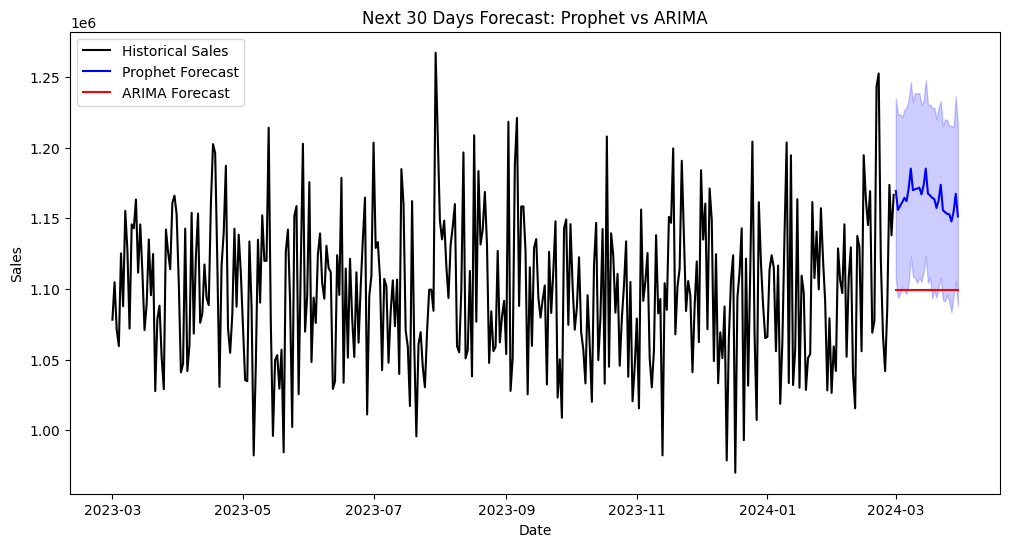

In [19]:
plt.figure(figsize=(12,6))
# Historical sales
plt.plot(df.index, df['Sales'], label='Historical Sales', color='black')
# Prophet forecast
plt.plot(prophet_next_30['ds'], prophet_next_30['yhat'], label='Prophet Forecast', color='blue')
plt.fill_between(prophet_next_30['ds'], 
                 prophet_next_30['yhat_lower'], 
                 prophet_next_30['yhat_upper'], color='blue', alpha=0.2)
# ARIMA forecast
plt.plot(arima_forecast_30.index, arima_forecast_30, label='ARIMA Forecast', color='red')

plt.title("Next 30 Days Forecast: Prophet vs ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Ensure datetime index
df = daily_sales.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

df['lag_1'] = df['Sales'].shift(1)
df['lag_2'] = df['Sales'].shift(2)
df['lag_3'] = df['Sales'].shift(3)
df['lag_7'] = df['Sales'].shift(7)

df['rolling_3'] = df['Sales'].shift(1).rolling(3).mean()
df['rolling_7'] = df['Sales'].shift(1).rolling(7).mean()

df = df.dropna()


In [21]:
# Last 30 days as test
train = df.iloc[:-30]
test = df.iloc[-30:]

X_train = train.drop(columns=['Sales'])
y_train = train['Sales']
X_test = test.drop(columns=['Sales'])
y_test = test['Sales']


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [23]:
# Predict
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print(f"XGBoost Evaluation on Last 30 Days:\nMAE: {mae:,.2f}\nRMSE: {rmse:,.2f}\nMAPE: {mape:.2f}%")


XGBoost Evaluation on Last 30 Days:
MAE: 52,019.19
RMSE: 66,917.29
MAPE: 4.60%


In [27]:
last_known = df.copy()
future_preds = []

for i in range(30):
    last_row = last_known.iloc[-1]
    new_row = {
        'lag_1': last_row['Sales'],
        'lag_2': last_row['lag_1'],
        'lag_3': last_row['lag_2'],
        'lag_7': last_known['Sales'].iloc[-7] if len(last_known) >= 7 else last_row['Sales'],
        'rolling_3': last_known['Sales'].iloc[-3:].mean(),
        'rolling_7': last_known['Sales'].iloc[-7:].mean() if len(last_known) >= 7 else last_row['Sales']
    }
    new_pred = model.predict(pd.DataFrame([new_row]))[0]
    future_preds.append(new_pred)

    new_row['Sales'] = new_pred
    last_known = pd.concat([last_known, pd.DataFrame([new_row], index=[last_known.index[-1] + pd.Timedelta(days=1)])])

xgb_forecast_30 = pd.Series(future_preds, index=pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30))


In [28]:
xgb_forecast_30

2024-03-01    1088518.625
2024-03-02    1073520.375
2024-03-03    1106338.125
2024-03-04    1127806.375
2024-03-05    1082766.000
2024-03-06    1072540.250
2024-03-07    1086292.625
2024-03-08    1133239.375
2024-03-09    1096744.625
2024-03-10    1077404.500
2024-03-11    1062929.250
2024-03-12    1099827.375
2024-03-13    1092474.500
2024-03-14    1125121.375
2024-03-15    1096490.375
2024-03-16    1096191.750
2024-03-17    1067859.875
2024-03-18    1104531.625
2024-03-19    1118982.000
2024-03-20    1052827.250
2024-03-21    1066682.125
2024-03-22    1116769.750
2024-03-23    1095327.250
2024-03-24    1066944.250
2024-03-25    1095622.625
2024-03-26    1089945.125
2024-03-27    1103654.125
2024-03-28    1097753.125
2024-03-29    1093624.250
2024-03-30    1132755.750
Freq: D, dtype: float32

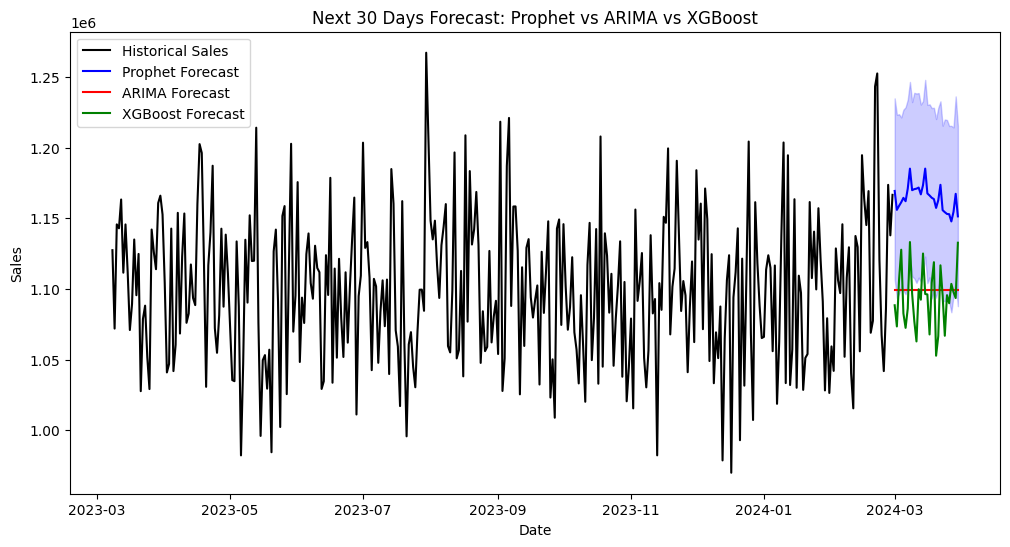

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sales'], label='Historical Sales', color='black')
plt.plot(prophet_next_30['ds'], prophet_next_30['yhat'], label='Prophet Forecast', color='blue')
plt.fill_between(prophet_next_30['ds'], 
                 prophet_next_30['yhat_lower'], 
                 prophet_next_30['yhat_upper'], color='blue', alpha=0.2)
plt.plot(arima_forecast_30.index, arima_forecast_30, label='ARIMA Forecast', color='red')
plt.plot(xgb_forecast_30.index, xgb_forecast_30, label='XGBoost Forecast', color='green')
plt.title("Next 30 Days Forecast: Prophet vs ARIMA vs XGBoost")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

### Insights

1. Prophet(Blue colour) helps us capturing the trends and seasonlity of the sales, with a confidence of 95%. Since our sales number do not vary
that much on daily basis using this with a 95% confidence we can plan on how to move ahead in terms of inventory.
2. ARIMA is not able to capture the details but is giving us a solid baseline around which the predictions are there for the total sales each day.
3. As such all models are predicting in similar direction with around 50-52k variation between sales numbers which seems like a small number in comparison with the total sales per day. 
4. Prophet is your most reliable for trend + seasonality and business-facing forecasts.
5. ARIMA gives a simple “baseline” (average) prediction — useful if sales are extremely stable.
6. XGBoost could be used for short-term operational planning if you want to capture minor daily fluctuations, promotions, or anomalies